# Machine Learning Mini Project
## (Supervised Linear Regression , Supervised Learning- Classification and Ensemble           Techniques , Unsupervised Learning)

Importing necessary Libraries

In [1]:
#importing numerical python
import numpy as np
#importing pandas 
import pandas as pd
#importing matplot library for visualization
import matplotlib.pyplot as plt
#importing seaborn library for visualization
import seaborn as sns
#importing warnings to ignore them
from warnings import filterwarnings
filterwarnings('ignore')
#importing Standard scaler
from sklearn.preprocessing import StandardScaler
#importing train test split
from sklearn.model_selection import train_test_split
#importing Linear regression
from sklearn.linear_model import LinearRegression
#importing For OLS model
import statsmodels.api as sm
#importing variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import necessary library for mean absolute error metric
from sklearn.metrics import mean_absolute_error
# Import necessary models for regression
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, ElasticNet
# Import necessary library for mean squared error metric
from sklearn.metrics import mean_squared_error
# Import necessary library for grid search
from sklearn.model_selection import GridSearchCV
#importing stats for calculations
import scipy.stats as stats
pd.options.display.max_columns=None
#importing Linear regression
from sklearn.linear_model import SGDRegressor

## Data Dictionary
1. Car_ID - Unique ID for each observation.
2. Symboling - Its assigned insurance risk rating, value +3 indicates that the auto is risky,+3 that it is pretty safe.
3. carCompany - Name of company
4. fueltype - Car fuel type.
5. aspiration - Aspiration used in car
6. doornumber - Number of doors in a car
7. carbody - body of car
8. drivewheel - type of drive wheel
9. enginelocation - location of car engine
10. wheelbase - Wheelbase of car
11. carlength - length of car
12. carwidth - width of car
13. carheight - height of car
14. curbweight - The weight of a car without occupants or luggage.
15. enginetype - type of engine
16. cylindernumber - cylinder placed in the car.
17. enginesize - size of car.
18. fuelsystem - Fuel system of car.
19. boreratio - Boreratio of car
20. stroke - Stroke or volume inside the engine.
21. compressionratio - compression ratio of car.
22. horsepower - Horsepower
23. peakrpm - car peak rpm
24. citympg - Mileage in city
25. highwaympg - Mileage on highway
26. Price( Dependent Variable) - Price of car

## Objective

We are required to model the prices of cars with the available independent variables. It will be used by management to understand how exactly the prices vary with the independent variables.They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be good for management to understand the pricing dynamics of the new market.

Step-3  Import the data set and check the following
- dimension of the dataset.
- data types.
- Missing value available in the dataset.
- Descriptive statistics of data and write the observation.

In [2]:
#Load dataset using pandas function of reading csv files
df_car=pd.read_csv('CarPrice_Assignment.csv')


In [3]:

#showing first 10 columns of loaded dataset
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# checking shape/dimension of the dataset
df_car.shape

(205, 26)





Their are 205 rows and 26 columns

In [5]:
#Checking for null values present in each column of dataframe
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Their is no null values present in dataset

In [6]:
#Checking for datatypes of each column of dataframe
df_car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# the full descriptive stats of numerical columns of dataset
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
# the full descriptive stats of categorical columns of dataset
df_car.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


Step-4 Data Cleaning
- Create the column as 'CompanyName' using 'CarName' Column. List down the unique 'CompanyName'.
- Check the correctness of data in the 'CompanyName' column.
- Check the duplicate data in the dataset.

In [9]:
# Create the column as 'CompanyName' using 'CarName' Column using lambda function
df_car['CompanyName']=df_car['CarName'].apply(lambda x : x.split(' ')[0])

In [10]:
#modifying car name 
df_car['CarName']=df_car['CarName'].apply(lambda x : x.split(' ')[-1])

In [11]:
# Checking for Company name column
df_car['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [12]:
# the data is incorrect as some companies have spelling mistakes like Nissan,vokswagen,toyouta,porcshce ,vw,maxda

In [13]:
# dictionary to rectify incorrect spellings
name_correct={'Nissan': 'nissan',
              'maxda': 'mazda',
              'vokswagen': 'volkswagen',
              'toyouta': 'toyota',
              'porcshce': 'porsche',
              'vw':'volkswagen'}

In [14]:
# replace function to replace company names
df_car['CompanyName']=df_car['CompanyName'].replace(name_correct)

In [15]:
#bringing the company name to 2nd index position of dataframe
company=df_car.pop('CompanyName')
df_car.insert(2,column='CompanyName',value=company)

In [16]:
# changing the datatype of Symboling column as mentioned in Data dectionary it is categorical column
df_car.symboling=df_car.symboling.astype('object')

In [17]:
# dictionary to rectify column data
ordinal_data={-3: 'Highly safe',
-2: 'Moderate Safe',
-1: 'Safe',
 0: 'Neutral',
1: 'Risky',
2: 'Moderate risky',
3: 'Highly risky'}

In [18]:
# Map function to replace Symboling column data
df_car.symboling = df_car.symboling.map(ordinal_data)

In [19]:
# we are checking for any duplicate values present in dataset
duplicate=df_car.duplicated()
duplicate[duplicate==True]

Series([], dtype: bool)

In [20]:
# From above we can see that their is no duplicate values present in whole dataframe

Step 5: Exploratory Data Analysis
- Visualize the 'price' column using displot and boxplot. Write down the observations.
- Perform the appropriate transformation to make the target as a gaussian distribution.
- Check the linear relationship between the dependent variable "Price" and the numerical
independent variables
- Checking the multicollinearity between the correlated independent variables above and
Price
- Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the
Target variables.
- Perform feature engineering based on sound knowledge of the business problem and
available dataset.

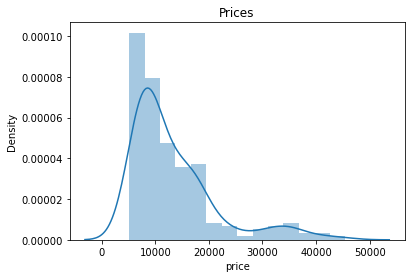

In [21]:
# Visualizing the price column through Boxplot
sns.distplot(df_car['price'])
plt.title('Prices')
plt.show()

In [22]:
# from above distplot we can see that the price is rightly skewed and most of prices lies in range of 10000

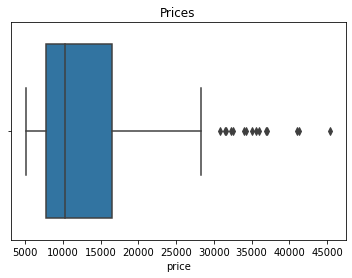

In [23]:
# Visualizing the price column through Boxplot
sns.boxplot(df_car['price'])
plt.title('Prices')
plt.show()

In [24]:
# from above Boxplot we can see that the price has any outliers present 

In [25]:
#adding a new column using log transformation technique to make price normal distribution
df_car['log_price']=np.log(df_car['price'])

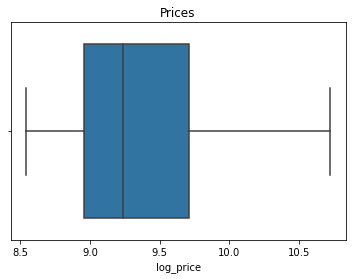

In [26]:
# Visualizing the log_price column through Boxplot
sns.boxplot(df_car['log_price'])
plt.title('Prices')
plt.show()

In [27]:
# from above plot we can see that log_price column has no outliers present 

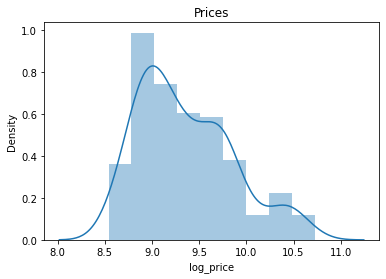

In [28]:
# Visualizing the price column through Distplot
sns.distplot(df_car['log_price'])
plt.title('Prices')
plt.show()

In [29]:
# from above plot we can see that log_price column is near to normal distribution

In [30]:
print(df_car['price'].skew())
print(df_car['log_price'].skew())

1.7776781560914454
0.672888533977329


In [31]:
# Also by comparing skewness of price and log_price columns we can say that price column is highly skewed as compared to log_price

In [32]:
#droping the column car_id as it does not convey any information to us
df_car.drop(columns='car_ID',inplace=True)

In [33]:
#considering only numerical columns
num_columns=df_car.select_dtypes(include=(np.number))

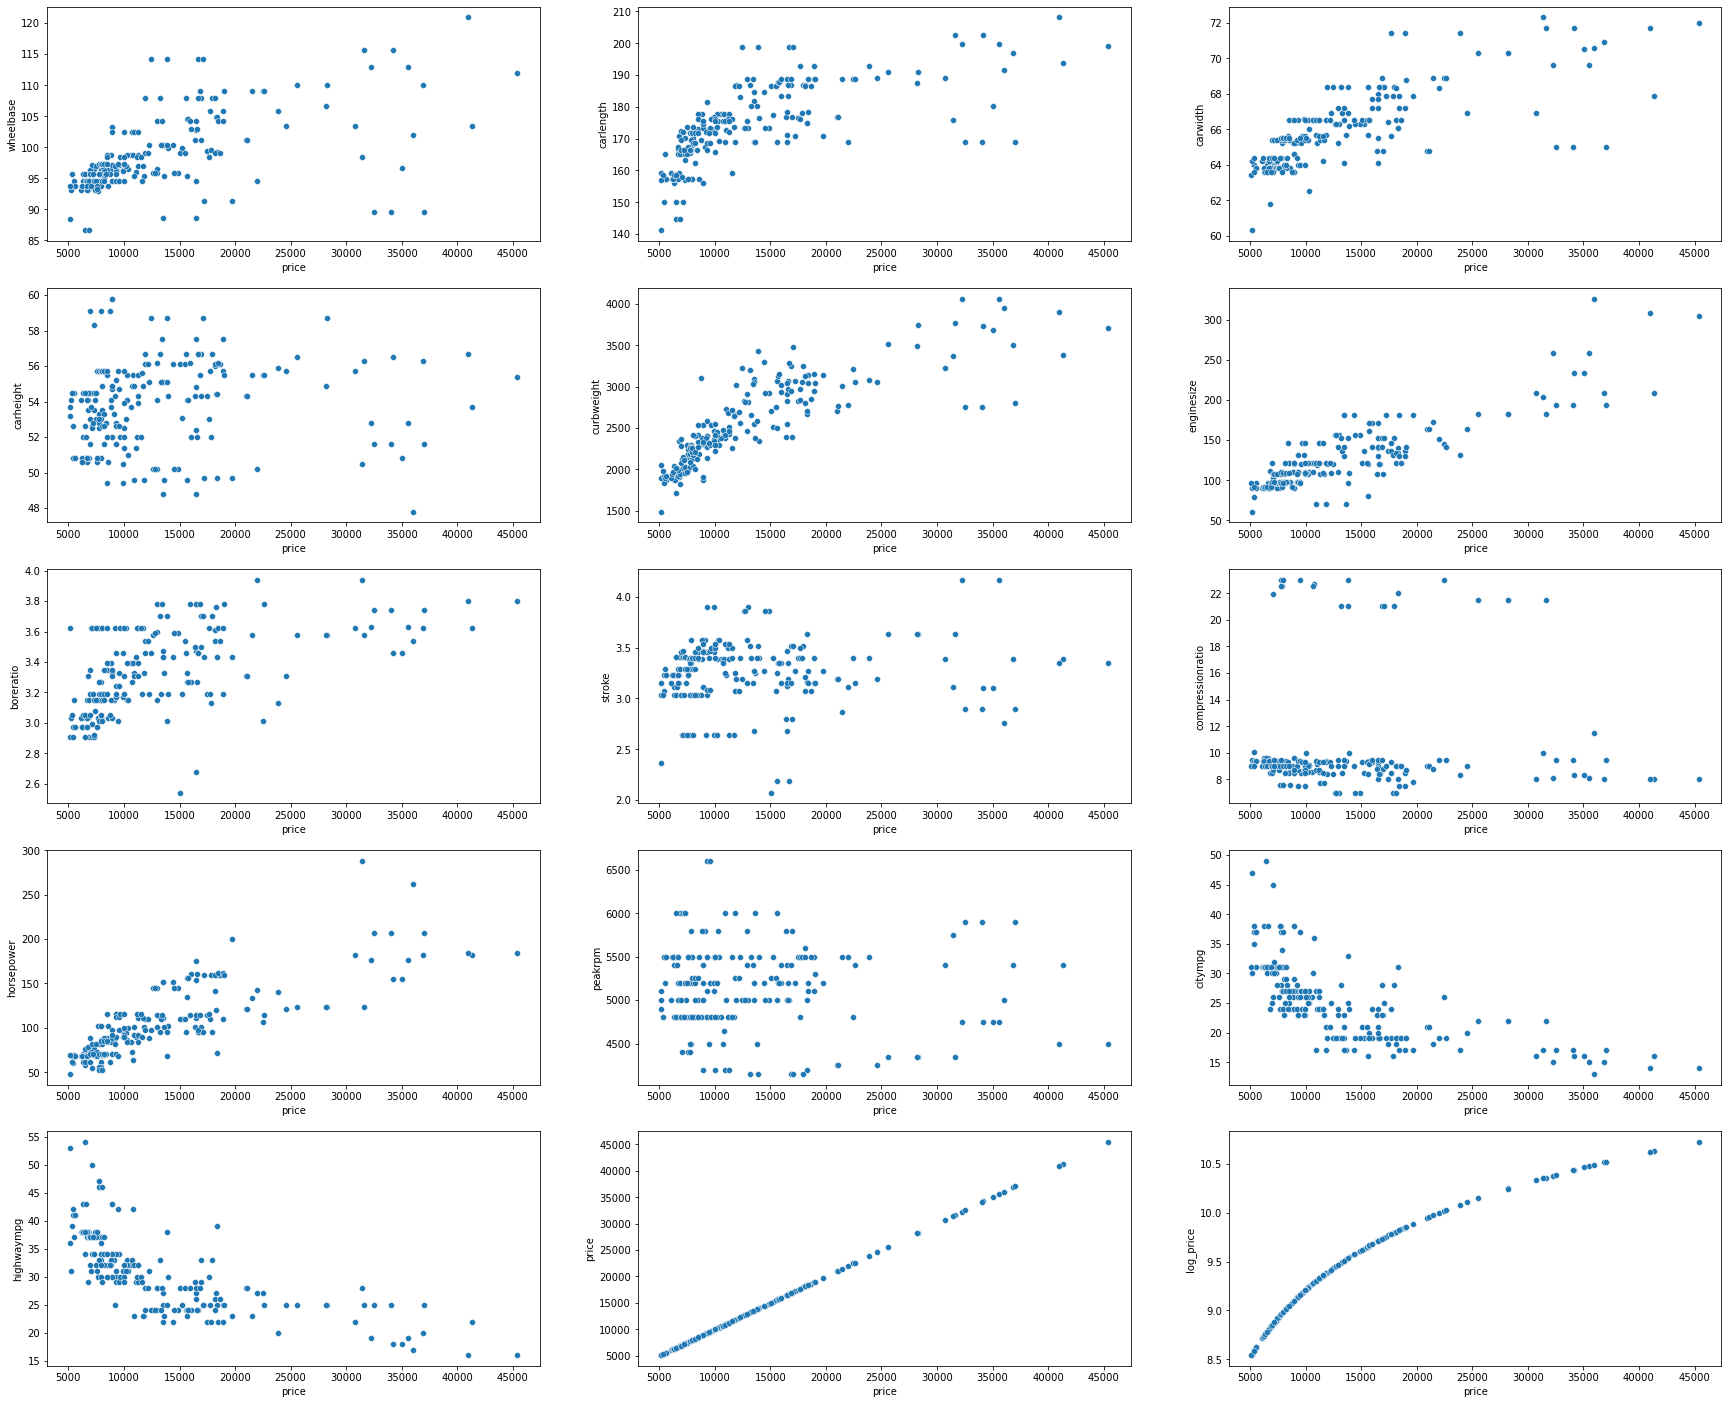

In [34]:
# Check the linear relationship between the dependent variable "Price" and the numerical independent variables
fig,ax=plt.subplots(nrows=5,ncols=3,figsize=(30,25))
for i,j in zip(num_columns.columns,ax.flatten()):
    sns.scatterplot(x=df_car['price'],y=df_car[i],ax=j)

In [35]:
#+correlation=curb_weight,enginesize,horsepower,carwidth,carlength,wheelbase,boretraito
#-correlation=citympg,highwaympg
#outliers=compressionratio

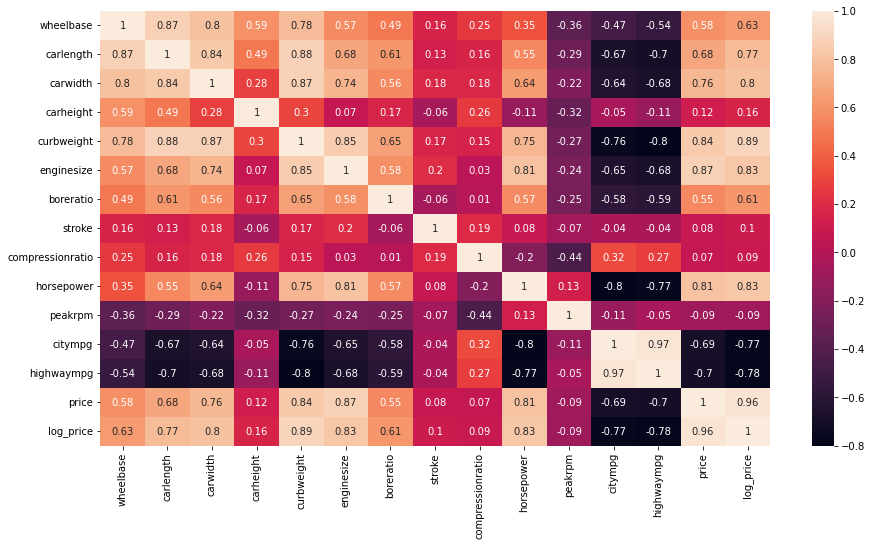

In [36]:
# Checking the multicollinearity between the correlated independent variables above and Price
plt.figure(figsize=(15,8))
sns.heatmap(round(df_car.corr(),2),annot=True)
plt.show()

In [37]:
# price highly  positive correlated with horsepower , enginesize , curbweight,carwidth,carlength,whhelbase,boretraito

## Univariate Analysis

In univariate analysis we considered only main columns which are highly related totarget column price

## Numerical columns visualization

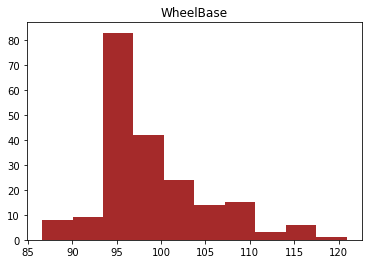

In [38]:
#Visualizing the Wheelbase column 
plt.hist(df_car['wheelbase'],color='brown')
plt.title('WheelBase')
plt.show()

In [39]:
# from above plot we can see that wheelbase column is right skewed

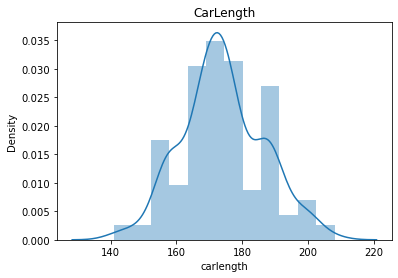

In [40]:
#Visualizing the Carlength column 
sns.distplot(df_car['carlength'])
plt.title('CarLength')
plt.show()

In [41]:
# from above plot we can see that Carlength column is Normally distributed

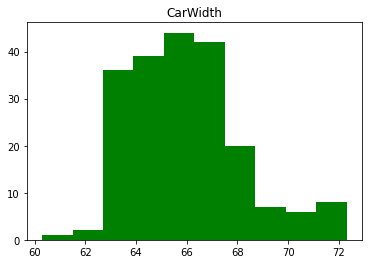

In [42]:
#Visualizing the Carwidth column 
plt.hist(df_car['carwidth'],color='green')
plt.title('CarWidth')
plt.show()

In [43]:
# from above plot we can see that CarWidth column is Normally distributed

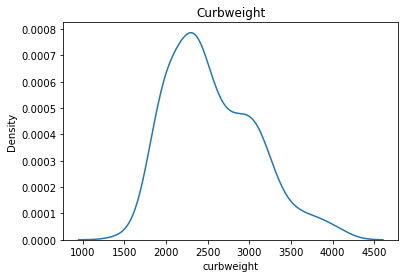

In [44]:
#Visualizing the Curbweight column 
sns.distplot(df_car['curbweight'],hist=False)
plt.title('Curbweight')
plt.show()

In [45]:
# from above plot we can see that Curbweight column is Normally distributed

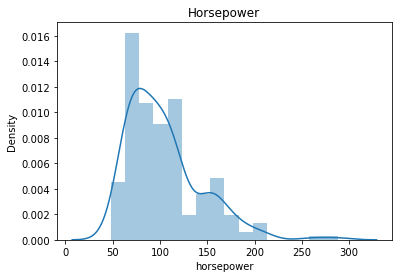

In [46]:
#Visualizing the Horsepower column 
sns.distplot(df_car['horsepower'])
plt.title('Horsepower')
plt.show()

In [47]:
# from above plot we can see that Horsepower column is right skewed

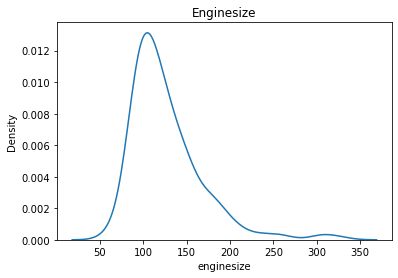

In [48]:
#Visualizing the engine size column
sns.distplot(df_car['enginesize'],hist=False)
plt.title('Enginesize')
plt.show()

In [49]:
# from above plot we can see that Enginesize column is right skewed

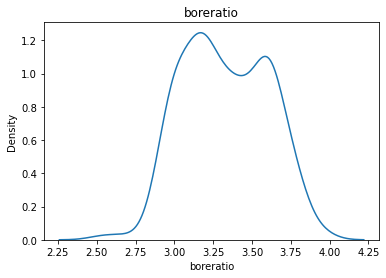

In [50]:
# Visualizing the boreratio through kdeplot
sns.distplot(df_car['boreratio'],hist=False)
plt.title('boreratio')
plt.show()

In [51]:
# from above plot we can see that boreratio column is not Normally distributed

## Categorical columns visualization

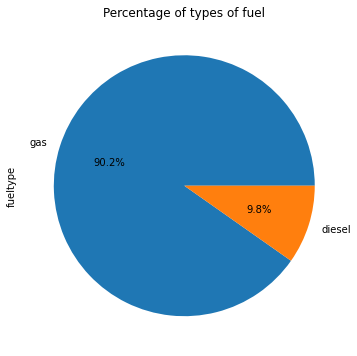

In [52]:
# Visualizing the Fuel column through pie plot
plt.figure(figsize=(8,6))
df_car.fueltype.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage of types of fuel')
plt.show()

In [53]:
# from above pie plot we can see that most of car are of Gas fuel type

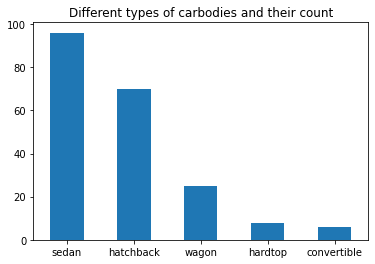

In [54]:
# Visualizing the Carbody column through bar plot
df_car.carbody.value_counts().plot(kind='bar',rot=0)
plt.title('Different types of carbodies and their count')
plt.show()

In [55]:
# from above bar plot we can see that most of carbody is Sedan 

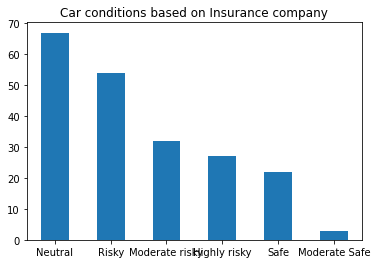

In [56]:
# Visualizing the Symboling column through bar plot
df_car.symboling.value_counts().plot(kind='bar',rot=0)
plt.title('Car conditions based on Insurance company')
plt.show()

In [57]:
# Most of Car conditions based on Insurance company are Neutral which means neighter so highly risky nor highly safe

# Bivariate Analysis

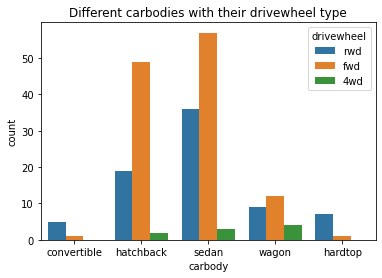

In [58]:
# visualize Different carbodies with their drivewheel type
sns.countplot(x=df_car.carbody,hue=df_car.drivewheel)
plt.title('Different carbodies with their drivewheel type')
plt.show()

In [59]:
# here rwd drivewheel is present more as compared to other kinds of drive wheel

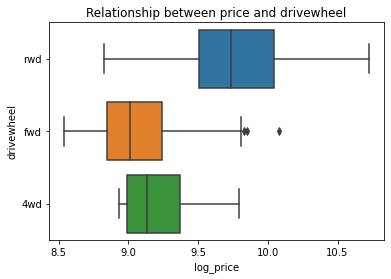

In [60]:
# visualize Relationship between price and drivewheel
sns.boxplot(df_car.log_price,df_car.drivewheel)
plt.title('Relationship between price and drivewheel')
plt.show()

Based on the above graph, it appears that rear-wheel-drive cars have their median prices slightly higher compared to other drivewheel types. This observation suggests that there might be a correlation between the drivetrain type and the median price of the cars

## Multivariate Analysis

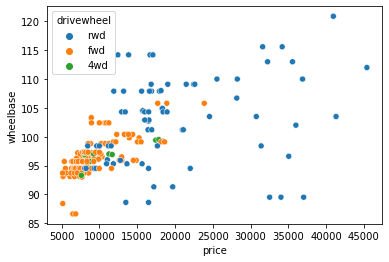

In [61]:
# displaying the price,wheelbase through scatterplot usinh a hue of drivewheel
sns.scatterplot(x=df_car['price'],y=df_car['wheelbase'],hue=df_car['drivewheel'])
plt.show()

In [62]:
# here rwd drivewheel is present more as compared to other kinds of drive wheel

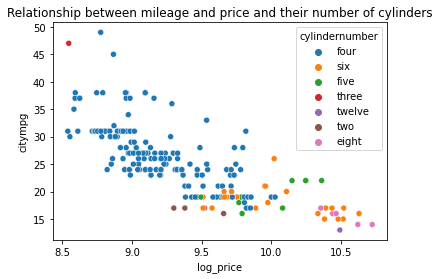

In [63]:
# displaying the log_price,citympg through scatterplot using a hue of cylindernumber
sns.scatterplot(df_car.log_price,df_car.citympg,hue=df_car.cylindernumber)
plt.title('Relationship between mileage and price and their number of cylinders')
plt.show()

There is an inverse relationship between the price of cars and their mileage. As the mileage of a car decreases, its price tends to increase.Furthermore, the data suggests that many of the higher-priced cars are equipped with more cylinders. This aligns with the general notion that vehicles with more cylinders often offer higher performance and power, which can be associated with luxury or high-performance cars that come at a premium price.

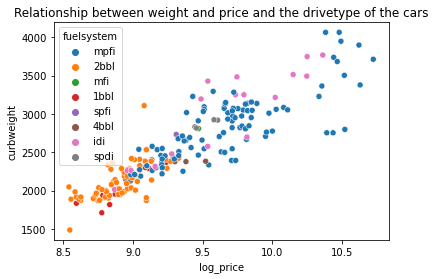

In [64]:
# displaying the log_price,curbweight through scatterplot using a hue of fuelsystems
sns.scatterplot(df_car.log_price,df_car.curbweight,hue=df_car.fuelsystem)
plt.title('Relationship between weight and price and the drivetype of the cars')
plt.show()

As observed earlier, there seems to be a positive correlation between the price of cars and their weight and dimensions. It's noticeable that as the weight and dimensions of the cars increase, their prices also tend to increase. Additionally, a significant trend is seen where many of the heavier and more expensive cars are equipped with rear-wheel drive.

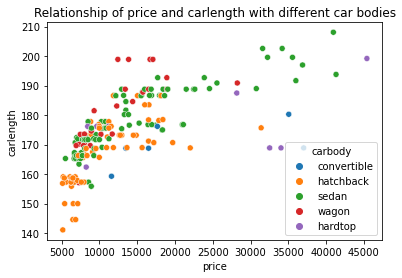

In [65]:
# displaying the price,carlength through scatterplot using a hue of carbody
sns.scatterplot(x=df_car['price'],y=df_car['carlength'],hue=df_car['carbody'])
plt.title('Relationship of price and carlength with different car bodies')
plt.show()

In [66]:
# From above we can state that sedan and hatcgback enginetype is mostly present in all cars

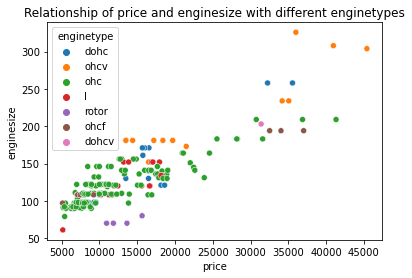

In [67]:
# displaying the price,enginesize through scatterplot using a hue of enginetype
sns.scatterplot(x=df_car['price'],y=df_car['enginesize'],hue=df_car['enginetype'])
plt.title('Relationship of price and enginesize with different enginetypes')
plt.show()

In [68]:
#from above we can state that ohc enginetype is mostly present in all cars

## Checking for Outliers

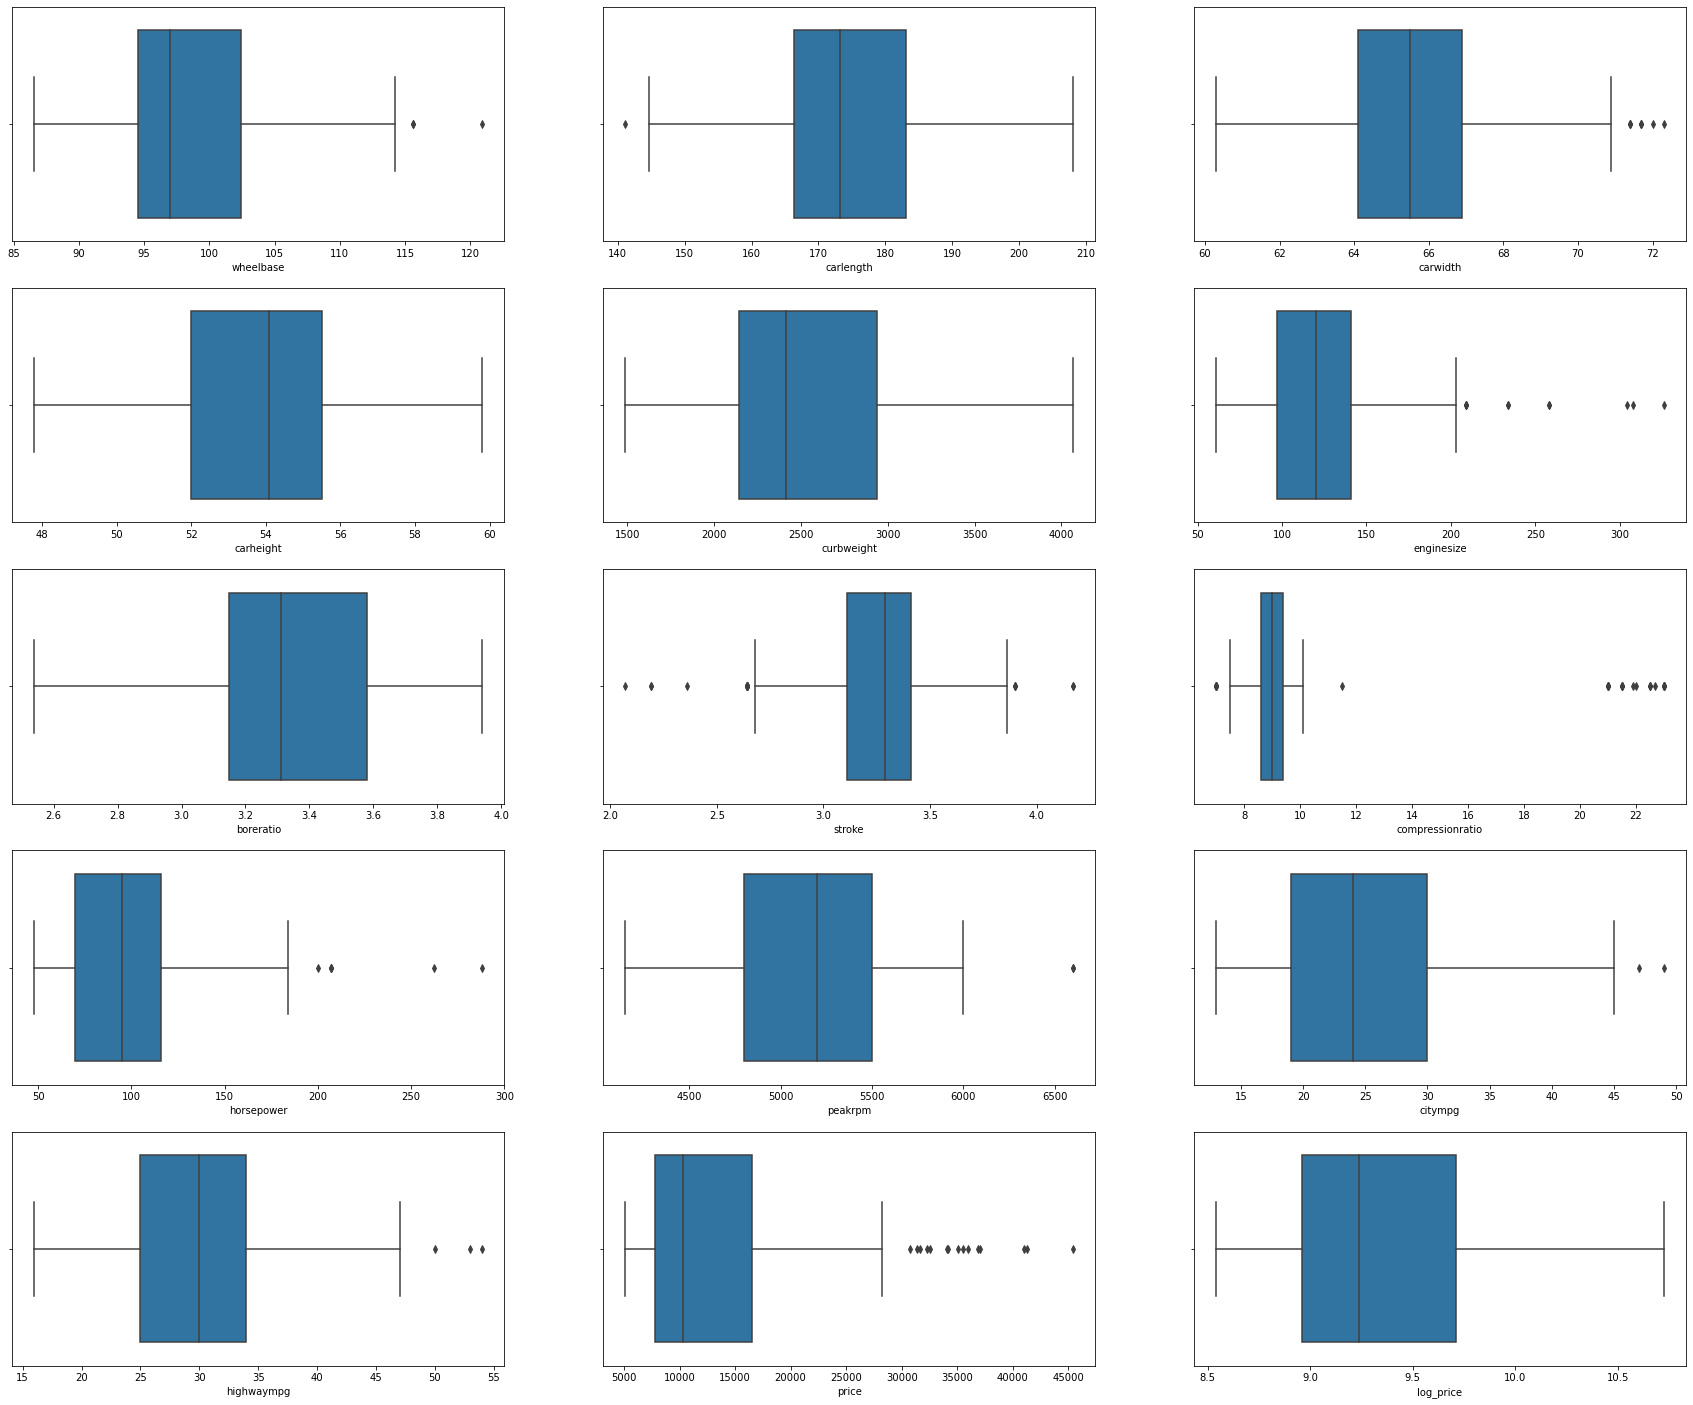

In [69]:
#checking for outleiers through boxplots
fig,ax=plt.subplots(nrows=5,ncols=3,figsize=(30,25))
for i,j in zip(num_columns.columns,ax.flatten()):
    sns.boxplot(df_car[i],ax=j)


In above plots curb_weight,enginesize,horsepower,carwidth,carlength,wheelbase,boretratio,citympg,highwaympg,stroke,compressionration,peakrpm has outliers present


## Feature Enginearning

In [70]:
#Descriptive Statistics of categorical columns
df_car.describe(include=object)

,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205,205,205
unique,6,22,120,2,2,2,5,3,2,7,7,8
top,Neutral,toyota,(sw),gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,32,10,185,168,115,96,120,202,148,159,94


In [71]:
# Here we are considering only those categoricalcolumns which has only two categories
cat_2_col=df_car[['fueltype','aspiration','doornumber','enginelocation']]

In [72]:
# By Considering two categorical columns performing Dummy encoding here and concating new columns in cat_2_col table
for i in cat_2_col.columns.values:
    df2=pd.get_dummies(df_car[i],prefix=i,drop_first=True)
    cat_2_col=pd.concat([cat_2_col,df2],axis=1)

In [73]:
# droping original columns of cat_2_col and taking only new columns into consideration
cat_2_col.drop(columns=['fueltype','aspiration','doornumber','enginelocation'],inplace=True)

In [74]:
# This dataframe we will concat with original data and drop these fueltype,aspiration,doornumber,enginelocation  columns
cat_2_col

,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
200,1,0,0,0
201,1,1,0,0
202,1,0,0,0
203,0,1,0,0


In step of feature encoding we are now apply encoding to Drivewheel,cylindernumber,carbody columns

In [75]:
#replacing the categories of drivewheel with numbers
df_car['drivewheel']=df_car['drivewheel'].replace({'fwd':1,'rwd':2,'4wd':3})

In [76]:
#replacing the categories of carbody with numbers
df_car['carbody']=df_car['carbody'].replace({'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5})

In [77]:
#Creating dictionary to replace words into figures
dict1={
    'twelve':12,
    'eight':8,
    'six':6,
    'five':5,
    'four':4,
    'three':3,
    'two':2
}

In [78]:
# maping the words into figures
df_car['cylindernumber']=df_car['cylindernumber'].map(dict1)

In [79]:
#creating a dataframe df 
df=pd.concat([df_car,cat_2_col],axis=1)
df.drop(columns=['fueltype','aspiration','doornumber','enginelocation'],inplace=True)

## Base Model

In base model we are not considering symboling,CompanyName,CarName,enginetype,fuelsystem columns 
1. Company column has 22 kinds of companies and we did not encoded the 22 company names and in further models we will not consider this column
2. Car column has 120 kinds of car and we did not encoded the 120 car names and in further models we will not consider this column

In [80]:
# these are the columns we did not taken into consideration
df.describe(exclude=np.number).columns

Index(['symboling', 'CompanyName', 'CarName', 'enginetype', 'fuelsystem'], dtype='object')

In [81]:
#seting variable X
X=df.drop(columns=['symboling','CompanyName','CarName','enginetype','fuelsystem','price','log_price'])
#seting variable y
y=df_car['price']
#seting constant
X=sm.add_constant(X)
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)
#Base model using ols
Base_model=sm.OLS(y_train,X_train).fit()
Base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.92e-49
Time:                        21:37:53   Log-Likelihood:                -1328.1
No. Observations:                 143   AIC:                             2698.
Df Residuals:                     122   BIC:                             2760.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.439e+04   2.28e+04     -1.951      0.053   -8.94e+04     649.730
carbody              -324.6607    319.737     -1.015      0.312    -957.613     308.291
drivewheel            808.9121    665.255      1.216      0.226    -508.026    2125.850
wheelbase             104.9736    114.853      0.914      0.363    -122.390     332.337
carlength             -33.5634     64.734     -0.518      0.605    -161.711      94.585
carwidth              440.0761    306.507      1.436      0.154    -166.686    1046.838
carheight             241.2594    151.318      1.594      0.113     -58.290     540.809
curbweight              0.4262      2.265      0.188      0.851      -4.058       4.910
cylindernumber       -906.0346    887.514     -1.021      0.309   -2662.957     850.888
enginesize            151.1399     31.697      4.768      0.000      88.392     213.887
boreratio           -4231.5823   1929.921     -2.193      0.030   -8052.054    -411.110
stroke              -2742.9968   1034.921     -2.650      0.009   -4791.727    -694.266
compressionratio      178.0473    588.268      0.303      0.763    -986.488    1342.582
horsepower             57.8799     27.378      2.114      0.037       3.683     112.077
peakrpm                 1.4162      0.852      1.663      0.099      -0.270       3.102
citympg               -94.5509    206.970     -0.457      0.649    -504.268     315.166
highwaympg            135.6189    200.544      0.676      0.500    -261.378     532.616
fueltype_gas          613.1311   8247.079      0.074      0.941   -1.57e+04    1.69e+04
aspiration_turbo     -106.5490   1237.092     -0.086      0.932   -2555.496    2342.398
doornumber_two       -302.4252    688.218     -0.439      0.661   -1664.822    1059.972
enginelocation_rear  8817.4271   2895.662      3.045      0.003    3085.176    1.45e+04
==============================================================================
Omnibus:                       32.240   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.934
Skew:                           0.826   Prob(JB):                     2.43e-21
Kurtosis:                       6.634   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# The columns such as carbody,stroke,carlength,cylindernumber,citympg are negativelly correlated with target column
#Durbin-watson value is between and 1.5 and 2.5 and hence there is no presence of autocorrelation and it 
#satisfies the assumptions of linear regression

In [83]:
p_model3=pd.DataFrame(Base_model.pvalues,columns=['pval'])
p_model3

,pval
const,0.053345
carbody,0.311926
drivewheel,0.226354
wheelbase,0.362529
carlength,0.605063
carwidth,0.153625
carheight,0.113438
curbweight,0.851050
cylindernumber,0.309337
enginesize,0.000005


In [84]:
p_model3[p_model3['pval']<0.05].index.to_list()

['enginesize', 'boreratio', 'stroke', 'horsepower', 'enginelocation_rear']

In [85]:
#These columns are less than 0.05 and effect the most in predicting price of car

In [86]:
# Extract required values
r_squared = Base_model.rsquared
adj_r_squared = Base_model.rsquared_adj
results = {'Method': [], 'R-squared': [], 'Adjusted R-squared': []}
results = pd.DataFrame(results)
results=results.append({'Method':'Using price column as a target variable','R-squared':r_squared,'Adjusted R-squared':adj_r_squared},ignore_index=True)
results

,Method,R-squared,Adjusted R-squared
0,Using price column as a target variable,0.891249,0.873421


In [87]:
# we can see that base model has 87% of accuracy using original pricecolumn

## Second model with target variable as Log_price column

In [88]:
X=df.drop(columns=['symboling','CompanyName','CarName','enginetype','fuelsystem','price','log_price'])
y=df_car['log_price']
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)
Base_model2=sm.OLS(y_train,X_train).fit()
Base_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     57.21
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.75e-52
Time:                        21:37:53   Log-Likelihood:                 62.701
No. Observations:                 143   AIC:                            -83.40
Df Residuals:                     122   BIC:                            -21.18
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.3552      1.359      3.941      0.000       2.666       8.045
carbody                -0.0140      0.019     -0.735      0.463      -0.052       0.024
drivewheel              0.0644      0.040      1.620      0.108      -0.014       0.143
wheelbase               0.0052      0.007      0.756      0.451      -0.008       0.019
carlength              -0.0009      0.004     -0.223      0.824      -0.009       0.007
carwidth                0.0260      0.018      1.422      0.158      -0.010       0.062
carheight               0.0069      0.009      0.759      0.449      -0.011       0.025
curbweight              0.0002      0.000      1.496      0.137   -6.54e-05       0.000
cylindernumber         -0.0612      0.053     -1.155      0.251      -0.166       0.044
enginesize              0.0038      0.002      2.016      0.046    6.98e-05       0.008
boreratio              -0.1929      0.115     -1.674      0.097      -0.421       0.035
stroke                 -0.0765      0.062     -1.238      0.218      -0.199       0.046
compressionratio        0.0567      0.035      1.615      0.109      -0.013       0.126
horsepower              0.0062      0.002      3.789      0.000       0.003       0.009
peakrpm              2.032e-05   5.09e-05      0.399      0.690   -8.04e-05       0.000
citympg                -0.0226      0.012     -1.831      0.070      -0.047       0.002
highwaympg              0.0148      0.012      1.234      0.220      -0.009       0.038
fueltype_gas            0.5158      0.493      1.047      0.297      -0.459       1.491
aspiration_turbo       -0.0363      0.074     -0.491      0.625      -0.183       0.110
doornumber_two         -0.0523      0.041     -1.273      0.206      -0.134       0.029
enginelocation_rear     0.2874      0.173      1.662      0.099      -0.055       0.630
==============================================================================
Omnibus:                        6.022   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.030
Skew:                           0.503   Prob(JB):                       0.0491
Kurtosis:                       2.966   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
#Durbin-watson value is between and 1.5 and 2.5 and hence there is no presence of autocorrelation and it 
#satisfies the assumptions of linear regression

In [90]:
# Extract required values
r_squared = Base_model2.rsquared
adj_r_squared = Base_model2.rsquared_adj

results=results.append({'Method':'Without treating outliers of independent variables(ols)','R-squared':r_squared,'Adjusted R-squared':adj_r_squared},ignore_index=True)
results

,Method,R-squared,Adjusted R-squared
0,Using price column as a target variable,0.891249,0.873421
1,Without treating outliers of independent varia...,0.903650,0.887855


In [91]:
# By using log_price column we can see that our accuracy increases so we will further use  the log_price column as y variable

In [92]:
# Checking for multicollinearity
vif=pd.DataFrame()
vif['feature']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

In [93]:
vif[vif['vif']>10]

,feature,vif
0,const,7936.953509
4,carlength,11.191342
7,curbweight,24.053028
8,cylindernumber,11.954241
9,enginesize,27.958910
12,compressionratio,82.434913
13,horsepower,12.866308
15,citympg,31.662102
16,highwaympg,29.330812
17,fueltype_gas,92.420652


In [94]:
# These columns have  high multicollinarity and might affect the performance of the model 

## Check For Homoscedasticity

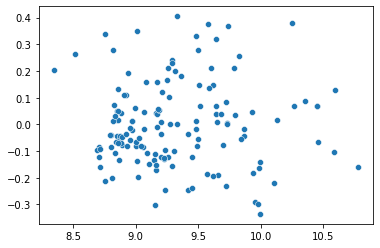

In [95]:
y_pred = Base_model2.fittedvalues
residual = Base_model2.resid
sns.scatterplot(y_pred,residual)
plt.show()

In [96]:
#There is no presence of Heteroscedasticity

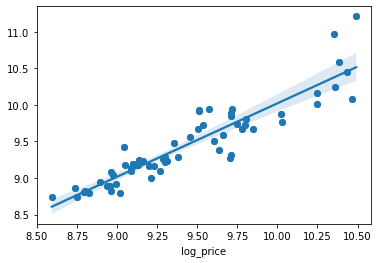

In [97]:
#predicting values and original y_test values
predict=Base_model2.predict(X_test)
plt.scatter(y_test,predict)
sns.regplot(y_test,predict)
plt.show()

In [98]:
# by above graph we can see the model is performing well, but we can explore various ways and make it better

##### To increase more accuracy we are trying to treat some outliers and doing encoding on rest of columns to see that will increase accuracy of model or not

In [99]:
#outliers treatment of highwaympg column using caping method
q1=df['highwaympg'].quantile(0.25)
q3=df['highwaympg'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ul

47.5

In [100]:
df['highwaympg']=np.where(df['highwaympg']>ul,ul,df['highwaympg'])

In [101]:
#outliers treatment of highwaympg column using caping method
q1=df['citympg'].quantile(0.25)
q3=df['citympg'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ul

46.5

In [102]:
df['citympg']=np.where(df['citympg']>ul,ul,df['citympg'])

##  Feature Engineering Revision

In [103]:
# dictionary to rectify column data
data1={'Highly safe':-3,
       'Moderate Safe':-2, 
       'Safe':-1,
       'Neutral':0,
       'Risky':1,
       'Moderate risky':2,
      'Highly risky':3}

In [104]:
#replacing the categories of drivewheel with numbers
df['symboling']=df['symboling'].map(data1)

In [105]:
#replacing the categories of carbody with numbers
df['enginetype']=df['enginetype'].replace({'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotor':6,'dohcv':7})

In [106]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [107]:
#replacing the categories of carbody with numbers
df['fuelsystem']=df['fuelsystem'].replace({'mpfi':1,'2bbl':2,'idi':3,'1bbl':4,'spdi':5,'4bbl':6,'mfi':7,'spfi':8})

#####  Model after revising feature engineering techniques and outlier treatment

In [108]:
X=df.drop(columns=['CompanyName','CarName','price','log_price'])
y=df_car['log_price']
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)
Base_model3=sm.OLS(y_train,X_train).fit()
Base_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     50.62
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.22e-50
Time:                        21:37:54   Log-Likelihood:                 65.437
No. Observations:                 143   AIC:                            -82.87
Df Residuals:                     119   BIC:                            -11.77
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.3361      1.417      4.472      0.000       3.531       9.142
symboling               0.0220      0.020      1.110      0.269      -0.017       0.061
carbody                -0.0180      0.019     -0.953      0.342      -0.055       0.019
drivewheel              0.0537      0.041      1.323      0.188      -0.027       0.134
wheelbase               0.0121      0.008      1.500      0.136      -0.004       0.028
carlength              -0.0023      0.004     -0.584      0.560      -0.010       0.005
carwidth                0.0154      0.019      0.820      0.414      -0.022       0.053
carheight               0.0005      0.009      0.052      0.958      -0.018       0.019
curbweight              0.0003      0.000      2.000      0.048    2.86e-06       0.001
enginetype             -0.0353      0.016     -2.240      0.027      -0.066      -0.004
cylindernumber         -0.0627      0.054     -1.161      0.248      -0.170       0.044
enginesize              0.0027      0.002      1.332      0.185      -0.001       0.007
fuelsystem             -0.0074      0.017     -0.446      0.656      -0.040       0.026
boreratio              -0.1805      0.116     -1.551      0.124      -0.411       0.050
stroke                 -0.1011      0.064     -1.568      0.120      -0.229       0.027
compressionratio        0.0488      0.036      1.339      0.183      -0.023       0.121
horsepower              0.0068      0.002      4.112      0.000       0.004       0.010
peakrpm              1.667e-05   5.11e-05      0.326      0.745   -8.45e-05       0.000
citympg                -0.0037      0.011     -0.318      0.751      -0.026       0.019
highwaympg             -0.0050      0.012     -0.423      0.673      -0.028       0.018
fueltype_gas            0.3632      0.511      0.712      0.478      -0.648       1.374
aspiration_turbo       -0.0827      0.074     -1.112      0.268      -0.230       0.064
doornumber_two         -0.0637      0.045     -1.413      0.160      -0.153       0.026
enginelocation_rear     0.3327      0.172      1.933      0.056      -0.008       0.674
==============================================================================
Omnibus:                        6.321   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.541
Skew:                           0.514   Prob(JB):                       0.0380
Kurtosis:                       2.792   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

In [109]:
#This has been the maximum accuracy achieved so far. We will now explore various methods to further fine-tune this model.
##Durbin-watson value is between and 1.5 and 2.5 and hence there is no presence of autocorrelation and it 
#satisfies the assumptions of linear regression
#p-value of F-test is less than 0.05 so we can say the variables are significant
#Also skewness is also less in above model

In [110]:
# Checking for multicollinearity
vif=pd.DataFrame()
vif['feature']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

In [111]:
vif[vif['vif']>10]

,feature,vif
0,const,8791.154598
4,wheelbase,10.485695
5,carlength,11.941914
8,curbweight,26.371234
10,cylindernumber,12.865027
11,enginesize,31.398755
15,compressionratio,83.544199
16,horsepower,14.420597
18,citympg,27.176822
19,highwaympg,25.998217


Vif refers to multicolleniarity and after filtering it out we have found these features are highly multicorrelated such as
wheelbase,carlength,curbweight,cylindernumber,enginesize,compressionratio,horsepower,citympg,highwaympg,
fueltype_gas

In [112]:
# Extract required values
r_squared = Base_model3.rsquared
adj_r_squared = Base_model3.rsquared_adj

results=results.append({'Method':'After performing feature enginearing ','R-squared':r_squared,'Adjusted R-squared':adj_r_squared},ignore_index=True)
results

,Method,R-squared,Adjusted R-squared
0,Using price column as a target variable,0.891249,0.873421
1,Without treating outliers of independent varia...,0.903650,0.887855
2,After performing feature enginearing,0.907268,0.889345


## Using SequentialFeatureSelector to know important variables 

In [113]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [114]:
# set of independent variables
X=df.drop(columns=['CompanyName','CarName','price','log_price'])

# dependent variable
y = df['log_price']

# split data into train subset and test subset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg = LinearRegression()


In [115]:
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2023-08-13 21:37:54] Features: 1/23 -- score: 0.7693837920153677[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2023-08-13 21:37:54] Features: 2/23 -- score: 0.8351014181113706[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2023-08-13 21:37:54] Features: 3/23 -- score: 0.8464242766669152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [116]:
#Best features according to SequentialFeatureSelector
sfs_forward.k_feature_names_

('symboling',
 'drivewheel',
 'wheelbase',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'stroke',
 'compressionratio',
 'horsepower',
 'highwaympg',
 'fueltype_gas',
 'doornumber_two',
 'enginelocation_rear')

In [117]:
#Accuracy given by SequentialFeatureSelector
print('\nR-squared: ', sfs_forward.k_score_)


R-squared:  0.8701456375801844


In [118]:
# from above Rsquare we get the r-squared values nearly to the previous model

In [119]:
#lets consider the important features that are showing high relation with the target variable and analyse the accuracy
X=df_car[['drivewheel','cylindernumber','curbweight','enginesize','horsepower','carwidth','carlength','boreratio','citympg','highwaympg','drivewheel']]
y=df_car['log_price']
X_train,X_test,y_train,y_test=train_test_split(X,y)


## Using Regularization 

In [120]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
ridge = Ridge(alpha =25)

# fit the model on train set using fit()
ridge_model = ridge.fit(X_train, y_train)

train_pred = ridge_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:

test_pred = ridge_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.1825
Root Mean Squared Error (RMSE) on test set:  0.1981


In [121]:
# use lasso() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
lasso = Lasso(alpha =7)

# fit the model on train set using fit()
lasso_model = lasso.fit(X_train, y_train)

train_pred = lasso_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:

test_pred = lasso_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.2242
Root Mean Squared Error (RMSE) on test set:  0.24


In [122]:
#When comparing both the ridge and lasso techniques, the model is demonstrating better performance with the ridge regularization method.

## Using Gridsearchcv

In [123]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11,12,14,15,16,17,18,19,20]}]
 
# instantiate the Ridge() method
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)
# Get the best estimator with optimal alpha
best_ridge_model = ridge_grid.best_estimator_

# Make predictions on both train and test sets
y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

# Calculate RMSE values
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print RMSE values for train and test datasets
print("Root Mean Squared Error (RMSE) on training set:", rmse_train)
print("Root Mean Squared Error (RMSE) on test set:", rmse_test)


Best parameters for Ridge Regression: {'alpha': 20}
Root Mean Squared Error (RMSE) on training set: 0.18224491277091162
Root Mean Squared Error (RMSE) on test set: 0.19761903218938767


In [124]:
# type your code here

# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11,12,14,15,16,17,18,19,20]}]
 
# instantiate the Ridge() method
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression:', lasso_grid.best_params_)
# Get the best estimator with optimal alpha
best_lasso_model = lasso_grid.best_estimator_

# Make predictions on both train and test sets
y_train_pred = best_lasso_model.predict(X_train)
y_test_pred = best_lasso_model.predict(X_test)

# Calculate RMSE values
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print RMSE values for train and test datasets
print("Root Mean Squared Error (RMSE) on training set:", rmse_train)
print("Root Mean Squared Error (RMSE) on test set:", rmse_test)

Best parameters for Ridge Regression: {'alpha': 7}
Root Mean Squared Error (RMSE) on training set: 0.22423003078178871
Root Mean Squared Error (RMSE) on test set: 0.24000121035014005


# Final Model

In [125]:
# In this model we not considering rows which have high multicolleniarity and negative correlation

In [126]:
# setting independent variable
X=df.drop(columns=['CompanyName','CarName','price','log_price','peakrpm','fuelsystem','carheight'])
# setting target variable
y=df_car['log_price']
# Adding a constant
X=sm.add_constant(X)
#Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)
Final_model=sm.OLS(y_train,X_train).fit()
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     59.53
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.16e-53
Time:                        21:37:57   Log-Likelihood:                 65.274
No. Observations:                 143   AIC:                            -88.55
Df Residuals:                     122   BIC:                            -26.33
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.2470      1.265      4.940      0.000       3.744       8.750
symboling               0.0224      0.019      1.155      0.250      -0.016       0.061
carbody                -0.0181      0.018     -0.981      0.328      -0.054       0.018
drivewheel              0.0563      0.039      1.435      0.154      -0.021       0.134
wheelbase               0.0128      0.007      1.723      0.087      -0.002       0.028
carlength              -0.0022      0.004     -0.569      0.570      -0.010       0.005
carwidth                0.0158      0.018      0.879      0.381      -0.020       0.051
curbweight              0.0003      0.000      2.030      0.045    6.87e-06       0.001
enginetype             -0.0363      0.015     -2.414      0.017      -0.066      -0.007
cylindernumber         -0.0606      0.052     -1.169      0.245      -0.163       0.042
enginesize              0.0024      0.002      1.280      0.203      -0.001       0.006
boreratio              -0.1861      0.110     -1.692      0.093      -0.404       0.032
stroke                 -0.1036      0.062     -1.670      0.097      -0.226       0.019
compressionratio        0.0534      0.035      1.531      0.128      -0.016       0.123
horsepower              0.0072      0.001      5.011      0.000       0.004       0.010
citympg                -0.0034      0.011     -0.303      0.763      -0.025       0.019
highwaympg             -0.0053      0.011     -0.466      0.642      -0.028       0.017
fueltype_gas            0.4320      0.486      0.889      0.376      -0.530       1.394
aspiration_turbo       -0.0923      0.070     -1.314      0.191      -0.231       0.047
doornumber_two         -0.0648      0.044     -1.474      0.143      -0.152       0.022
enginelocation_rear     0.3354      0.167      2.004      0.047       0.004       0.667
==============================================================================
Omnibus:                        5.734   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.897
Skew:                           0.482   Prob(JB):                       0.0524
Kurtosis:                       2.751   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
#This has been the maximum accuracy achieved so far. We will now explore various methods to further fine-tune this model.
##Durbin-watson value is between and 1.5 and 2.5 and hence there is no presence of autocorrelation and it 
#satisfies the assumptions of linear regression
#p-value of F-test is less than 0.05 so we can say the variables are significant
#Also skewness is also less in above model
#Difference between R-square and adjusted R-Square is also very low which states that their is no garbage values prsent in model

In [128]:
# Extract required values
r_squared = Final_model.rsquared
adj_r_squared = Final_model.rsquared_adj

results=results.append({'Method':'Finalmodel ','R-squared':r_squared,'Adjusted R-squared':adj_r_squared},ignore_index=True)
results

,Method,R-squared,Adjusted R-squared
0,Using price column as a target variable,0.891249,0.873421
1,Without treating outliers of independent varia...,0.903650,0.887855
2,After performing feature enginearing,0.907268,0.889345
3,Finalmodel,0.907056,0.891819


In [ ]:
# from above we can see that Maximum adjusted R square is 0.891 which maximum from all other models

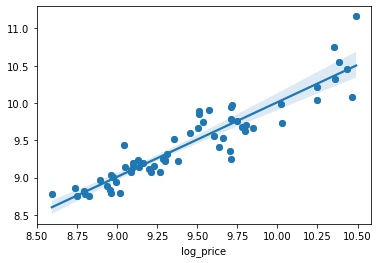

In [134]:
#predicting values and original y_test values
predict=Final_model.predict(X_test)
plt.scatter(y_test,predict)
sns.regplot(y_test,predict)
plt.show()

In [1]:
# this is also showing model is fitted accurately

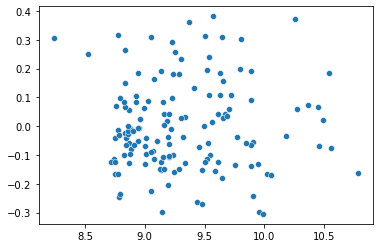

In [135]:
y_pred = Final_model.fittedvalues
residual = Final_model.resid
sns.scatterplot(y_pred,residual)
plt.xlabel('residuals')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
# thier is no pattern we can see here which means that residuals are normally distributed

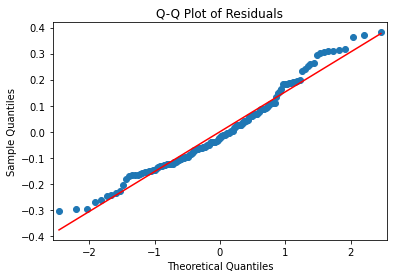

In [136]:
sm.qqplot(residual, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

1. The points follow the straight line closely, it suggests that residuals are normally distributed.

2. The tails of residuals deviate significantly from the theoretical line, it  indicate  light-tailed behavior 


## Business Understanding

#### Positively Correlated Features:

- Curb Weight: Heavier cars tend to be associated with higher prices. This could be due to the perception of increased quality and luxury associated with larger, sturdier vehicles.

- Engine Size: Larger engine sizes often indicate higher performance and power, which can lead to higher prices for more powerful and sporty vehicles.

- Horsepower: Higher horsepower is a strong indicator of performance and acceleration. Cars with higher horsepower are generally considered to be high-performance and luxurious, leading to higher prices.

- Car Width, Car Length, Wheelbase: These dimensions contribute to the overall size and space inside the car. Larger cars often offer more interior space and a sense of luxury, resulting in higher prices.

- Bore to Stroke Ratio: This ratio can impact the engine's efficiency and performance. Cars with optimized engine configurations for better power output tend to be priced higher.

#### Negatively Correlated Features:

- City MPG, Highway MPG: Fuel efficiency is inversely correlated with car price. More fuel-efficient cars are often favored for lower operational costs, leading to more budget-friendly options.
Other Features:

- Drivewheel: The type of drivewheel (e.g., front-wheel drive, rear-wheel drive, all-wheel drive) can influence performance and handling. All-wheel-drive and rear-wheel-drive cars may be associated with higher prices due to improved traction and handling capabilities.

- Cylindernumber: The number of cylinders in the engine can affect power and performance. Cars with more cylinders, like V6 or V8 engines, are typically associated with higher-priced, performance-oriented vehicles.

- Car Body: Different car body styles (e.g., sedan, coupe, convertible) appeal to different market segments. More luxurious or sporty body styles tend to command higher prices.

#### Inferences:

- Geely Auto can consider leveraging the positive correlation features to position their cars as high-performance, luxurious, and spacious options in the US market, potentially allowing for premium pricing.
- To appeal to budget-conscious consumers, Geely Auto could emphasize cars with better fuel efficiency (higher MPG) to offer affordable options.
- Geely Auto might focus on marketing and developing cars with varying drivewheel types and cylinder numbers to cater to different preferences and market segments.
